# Computação Evolucionária

## Trabalho Prático 2

+ Amanda Kellen Soares de Pinho - 2017098188
+ Lucas Araujo Azevedo - 2017104188

# Questão 1
## a)

Para calcular a probabilidade temos que cada caracter da string alvo tenha `26+1` chances que cair corretamente (26 maiúsculas letras no alfabeto e maiúsculas, 1 caracter de espaço). Temos que para cada letra um total de 53  possíveis opções. Para que nossa frase seja exatamente igual na primeira tentativa temos a seguinte cáculo: 1/(53^28), sendo 28 a nossa quantidade de caracteres o que nos resulta em uma probabilidade de **1/4161536836220038342098551818958537752576** que é igual a **2.402958424629275e-40%**.

## b)

O algoritmo genético supera essa probabilidade por conta que ele corta o espaço de probabilidade de letras, então ele vai decrescendo essa probabilidade (ele vai evoluindo a cada interação), com essa diminuição do espaço possível para os caracteres ele converje mais rapidamente.

## c)

Fazer com que população de strings evolua para a string objetivo: "METHINKS\*IT\*IS\*LIKE\*A\*WEASEL"

### Qual a probabilidade de uma string gerada aleatoriamente ser exatamente igual à string alvo?
A probabilidade desse evento acontecer é de $\frac{1}{37}^{28}$, considerando como possíveis caracteres as letras maiúsculas, minúsculas e o asterisco. Dessa forma, mesmo partindo de strings aleatórias, o GGA consegue superar essa probabilidade, reproduzindo a mesma dinâmica que ocorre na seleção natural.

### Imports

In [58]:
import random
import string
import copy
import numpy as np
import random
import matplotlib.pyplot as plt

### Representação dos caracteres válidos

Para geração de strings aleatórias utilziaremos os caracteres em formato de ASCII, gerando strings aleatórias.

In [59]:
values_representation = list(np.arange(48,58)) # maiusculos
values_representation += list(np.arange(65,91))# minusculos
values_representation += [42] # *

### Geração da população
Funções relativas à geração da população.

In [60]:
# gera string aleatória somente com letras maiusculas e minusculas (sem digitos ou caracteres especiais) 
def get_random_string(length=28):
    # choose from all lowercase letter
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# adiciona asteriscos aleatórios em posições aleatórias da string
def add_random_asterisk(word):
    number_of_asterisks = random.randint(0,len(word))
    for _ in range(number_of_asterisks):
        random_idx = random.randint(0,len(word)-1)
        word_to_list = list(word)
        word_to_list[random_idx] = '*'
        word = "".join(word_to_list)
    return word

# gerar população de strings
def generate_pop(pop_size):
    pop = []
    for _ in range(pop_size):
        pop.append(add_random_asterisk(get_random_string()))
    return pop

### Conversão ASCII <-> *char*
Funções para conversão de vetores e pop. de ASCII para char, e vice-versa.

In [61]:
# converter de char para int (ascii)
# recebe string, retorna vetor de inteiros
def word_to_integer_vector(word):
    return list(map(lambda x: ord(x),list(word)))

# converter pop. inteira de char para int (ascii)
def w2c_entire_pop(pop):
    return list(map(lambda x: word_to_integer_vector(x), pop))

# converter de ascii para char, retorna string
# recebe vetor de inteiros, retorna string 
def integer_to_word_vector(vector):
    return ''.join(list(map(lambda x: chr(x),vector)))

# converter pop. inteira de ascii para char
def c2w_entire_pop(pop):
    return list(map(lambda x: integer_to_word_vector(x), pop))

### Cálculo de Fitness
Função para cálculo de fitness dos indivíduos. 

In [62]:
# função de custo
# soma das diferenças entre os valores das duas strings
def fitness_nq(int_vec_word, target="METHINKS*IT*IS*LIKE*A*WEASEL"):
    int_target = word_to_integer_vector(target)
    return np.sum(np.abs(int_vec_word - int_target))

# recebe vetor de ints (que representa uma palavra)
def evaluate_loss_function(int_vec_word, target="METHINKS*IT*IS*LIKE*A*WEASEL"):
    print(f"Word:   {integer_to_word_vector(int_vec_word)}\n")
    print(f"Target: {target}\n")
    result = []
    int_target = word_to_integer_vector(target)
    for i in range(len(int_vec_word)):
        result.append(np.abs(int_vec_word[i] - int_target[i]))
    return np.sum(result)

### Mutação
Funções usadas para a mutação.

In [63]:
# retorna caracter dentro da lista dos caracteres válidos
def get_caract_random():
    p = random.randint(0,len(values_representation)-1)
    return values_representation[p]

# função de mutação escolhe uma posição dentro de um indivíduo e a 
# troca por um caractere aleatório (dentro dos caracteres válidos)
def mutation(offspring, mutation_rate):
    size_ind = len(offspring[0])
    population_copy = copy.copy(offspring)
    for i in range(len(population_copy)):
        if float(random.randint(0, 10))/10 <= mutation_rate:
            loc = random.randint(0,size_ind-1)
            mut = get_caract_random()
            population_copy[i,loc] = mut
    return population_copy

### Seleção dos melhores indivíudos (ranking dos indivíduos)

Primeiramente, foi considerado o uso da substituição da geração atual inteira pela offsprin, o que seria alcançado cruzando todos os indivíduos entre si.
No entanto, não o fizemos.

Chegou-se na conclusão que não fazia muito sentido usar essa abordagem, tendo em vista que não estava sendo forçada a seleção natural.
Foi feito como na Tarefa #1: substituiram-se os piores da geração anterior pelos melhores da nova geração.

In [64]:
def selection(population, cut, k = 5):
    scores = []
    # escolhendo k indivíduos aleatórios     
    for individual in random.choices(population, k=k):
        fitness_score = fitness_nq(individual)
        scores.append((fitness_score, individual))
    sorted_scores = sorted(scores, key=lambda tup: tup[0])
    best_ones = sorted_scores[:cut] 
    return list(map(lambda x: x[1], best_ones))

### Função de Crossover
Recebe dois indivíduos e gera dois filhos. 
Uso de um ponto de corte aleatório.
Valores pares.

In [65]:
# crossover (reprodução)
def crossover(subset_parents, cross_over_rate):
    new_ = []
    if float(random.randint(0, 10))/10 <= cross_over_rate:
        size_n = len(subset_parents[0])
        for i in range(0,int(len(subset_parents)/2),2):
            cut_v = random.randint(1, size_n-1)
            son1 = np.concatenate((subset_parents[i][0:cut_v], subset_parents[i+1][cut_v:]))
            son2 = np.concatenate((subset_parents[i+1][0:cut_v], subset_parents[i][cut_v:]))
            new_.append(son1)
            new_.append(son2)
    else:
        new_ = subset_parents
        
    return np.array(new_)

### Função de Substituição da população - Seleção Natural

In [66]:
# Seleção natural
# sustituir os piores pelos melhores
def replacement(offspring_new, pop):
    pop = np.concatenate((pop,offspring_new), axis=0)
    evaluate_v = []
    for indv in pop:
        evaluate_v.append(fitness_nq(indv))
    
    sorted_ = sorted(range(len(evaluate_v)), key=evaluate_v.__getitem__)
    pop_order = pop[sorted_]
    
    pop_order = pop_order[:-len(offspring_new)]
    
    return pop_order

### Executando a evolução

In [67]:
cross_over_rate = 0.7
mutation_rate = 0.7
n_inter_max = 1000
cut = 40
k = 100

pop = generate_pop(200)
pop = np.array(w2c_entire_pop(pop))

array([[120,  89,  86, ...,  69,  66, 112],
       [120,  65, 113, ..., 103, 118,  66],
       [ 87,  42,  42, ...,  42,  42, 110],
       ...,
       [110,  42,  42, ..., 108, 101,  42],
       [ 86, 109,  99, ..., 104, 100, 112],
       [120,  89,  42, ...,  98,  42,  42]])

In [68]:
sol = []
n_iter = 0
fitness_avg = []
best_of_generation = []
smallest_fitness = 1000

while n_iter < n_inter_max and smallest_fitness > 0:
    
    subset_parents = selection(pop, cut, k = k)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    fitness_scores = []
    last = fitness_nq(pop[0])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if last < smallest_fitness:
            smallest_fitness = last
            sol = copy.copy(pop[0])
    

    best_of_generation.append(smallest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
    
    if n_iter%80 == 0:
        print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
    n_iter += 1

print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {smallest_fitness}")

Fitness da geração menor valor 0: 475

Fitness da geração menor valor 80: 66

Fitness da geração menor valor 160: 25

Fitness da geração menor valor 240: 11

Fitness da geração menor valor 320: 5

Fitness da geração menor valor 400: 2

Fitness da geração menor valor 423: 0

Melhor solução encontrada: [77 69 84 72 73 78 75 83 42 73 84 42 73 83 42 76 73 75 69 42 65 42 87 69
 65 83 69 76]
Fitness da melhor solução encontrada: 0


### Solução encontrada
Como pode ser visto, obteu-se um indivíduo igual ao objetivo.

In [69]:
print('Número de interações: {}'.format(n_iter))
print(f"Result: {integer_to_word_vector(sol)}")

Número de interações: 423
Result: METHINKS*IT*IS*LIKE*A*WEASEL


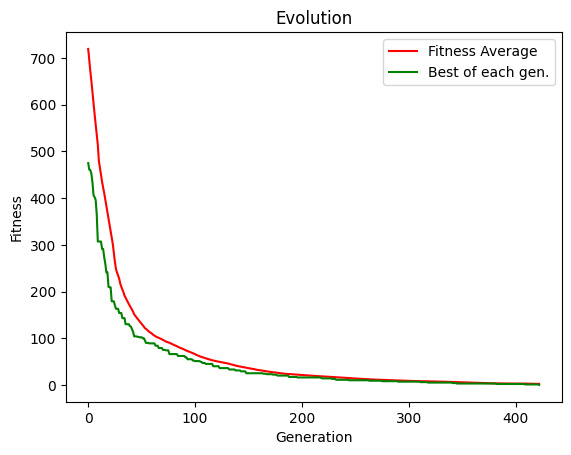

In [70]:
# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

### Testes com a taxa de mutação e crossover
Ao se usar a taxas de crossover e mutação sugeridas pelo enunciado, o algoritmo não obteve uma performance tão boa quanto havia obtido na primeira execução.
Nesta segunda execução, a taxa de mutação foi > 0.1 e a taxa de crossover foi de 0.6.

Fitness da geração menor valor 0: 499

Fitness da geração menor valor 80: 114

Fitness da geração menor valor 160: 53

Fitness da geração menor valor 240: 30

Fitness da geração menor valor 320: 17

Fitness da geração menor valor 400: 11

Fitness da geração menor valor 480: 7

Fitness da geração menor valor 560: 4

Fitness da geração menor valor 640: 3

Fitness da geração menor valor 720: 2

Fitness da geração menor valor 790: 0

Melhor solução encontrada: [77 69 84 72 73 78 75 83 42 73 84 42 73 83 42 76 73 75 69 42 65 42 87 69
 65 83 69 76]
Fitness da melhor solução encontrada: 0
Número de interações: 790
Result: METHINKS*IT*IS*LIKE*A*WEASEL


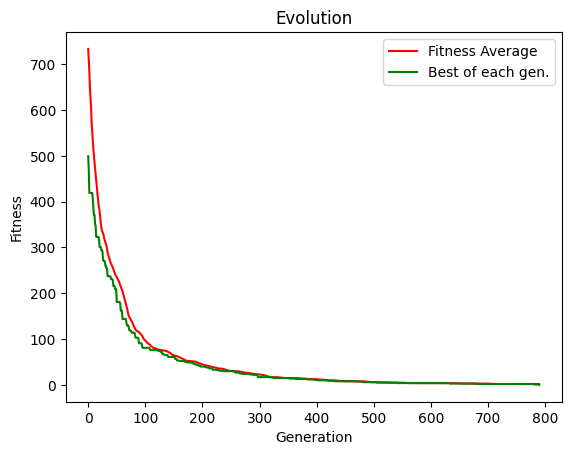

In [71]:
cross_over_rate = 0.6
mutation_rate = 0.1

pop = generate_pop(200)
pop = np.array(w2c_entire_pop(pop))

sol = []
n_iter = 0
fitness_avg = []
best_of_generation = []
smallest_fitness = 1000

while n_iter < n_inter_max and smallest_fitness > 0:
    
    subset_parents = selection(pop, cut, k = k)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    fitness_scores = []
    last = fitness_nq(pop[0])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if last < smallest_fitness:
            smallest_fitness = last
            sol = copy.copy(pop[0])
    

    best_of_generation.append(smallest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
    
    if n_iter%80 == 0:
        print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
    n_iter += 1

print (f"Fitness da geração menor valor {n_iter}: {last}\n")    
print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {smallest_fitness}")

print('Número de interações: {}'.format(n_iter))
print(f"Result: {integer_to_word_vector(sol)}")

# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()